## 1、多层线性模型做统计功效，确定样本量是否充足
#### 统计功效概念，与样本量关系
#### 如何实现
#### 增大被试量？还是增大观测次数？
## 2、广义线性模型做统计功效，如何实现
# 

# 多层线性模型——统计功效和样本量（Power Analysis for MLM）

我们常常避不开一个问题：你的样本量够吗？
本节我们学习如何根据统计功效确定最小样本量，或根据样本量确定统计功效。

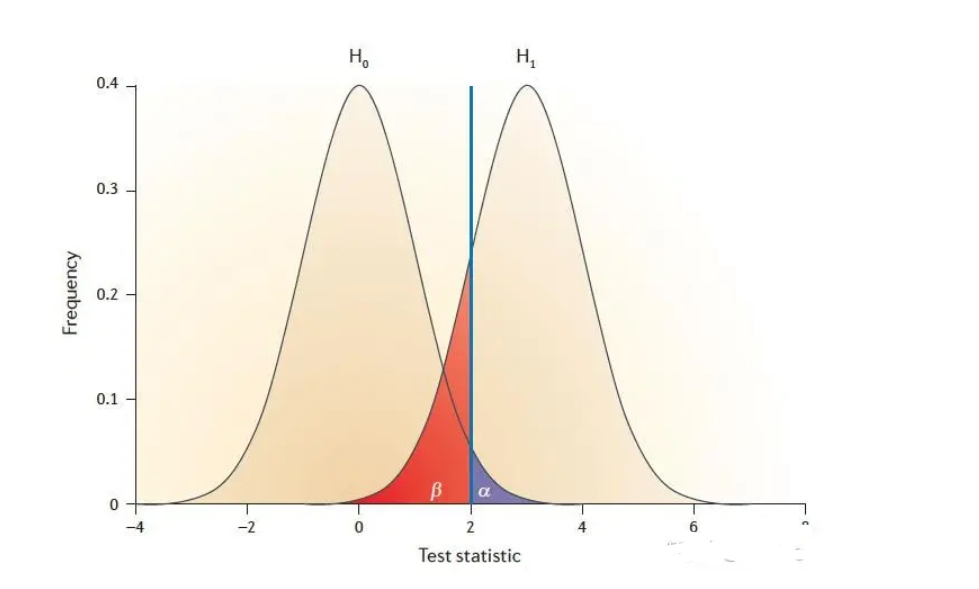

#### 载入数据库

In [5]:
library(psych) # 用于描述数据
library(lme4) # 多层线性模型函数库
library(simr)  # 在R中用于做 power analysis 的函数库
library(ggplot2) # 用于做可视化
library(plyr)  # 用于做数据整理
library(lmerTest)   # 计算 p 值

Warning message:
"程辑包'psych'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'lme4'是用R版本4.2.3 来建造的"
载入需要的程辑包：Matrix

Warning message:
"程辑包'Matrix'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'simr'是用R版本4.2.3 来建造的"

载入程辑包：'simr'


The following object is masked from 'package:lme4':

    getData


Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"

载入程辑包：'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"程辑包'plyr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'lmerTest'是用R版本4.2.2 来建造的"

载入程辑包：'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




我们使用这样一个数据：

50个人，每个人追踪16次，每天测一次问卷，探讨治疗和亲密之间的关系

#### 载入数据

In [2]:
data_intimacy <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与多层线性模型/BLdata_time.csv",header=TRUE)

#### 描述数据

In [3]:
head(data_intimacy)

,id,time,time01,intimacy,treatment
,<int>,<int>,<dbl>,<dbl>,<int>
1,1,0,0.0000000,2.96,0
2,1,1,0.0666667,2.34,0
3,1,2,0.1333333,4.88,0
4,1,3,0.2000000,2.99,0
5,1,4,0.2666667,3.13,0
6,1,5,0.3333333,2.73,0


In [4]:
# 人数
length(unique(data_intimacy$id))

[1] 50

In [5]:
# 时间点数
length(unique(data_intimacy$time))

[1] 16

In [6]:
# 呈现 被试-时间点 概况
xtabs(~id+time, data=data_intimacy)

    time
id   0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  1  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  2  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  3  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  4  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  5  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  6  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  7  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  8  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  9  1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  10 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  11 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  12 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  13 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  14 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  15 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  16 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  17 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  18 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  19 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  20 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  21 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  22 1 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1
  

#### 使用多层线性模型建模：treatment 对 intimacy 的影响

In [12]:
# 使用 lme4 函数库的 lmer建模
fit_lgmodel <- lmer(intimacy ~ 1 + time01 + treatment + time01:treatment + 
                      (1 + time01 | id),
                    data=data_intimacy,
                    na.action = na.exclude)
# 提取统计结果
summary(fit_lgmodel)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: intimacy ~ 1 + time01 + treatment + time01:treatment + (1 + time01 |  
    id)
   Data: data_intimacy

REML criterion at convergence: 2834.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6242 -0.6798 -0.0190  0.6433  2.4463 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 id       (Intercept) 0.6858   0.8281        
          time01      1.8936   1.3761   -0.45
 Residual             1.6925   1.3010        
Number of obs: 800, groups:  id, 50

Fixed effects:
                 Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       2.89897    0.20703 47.99991  14.003   <2e-16 ***
time01            0.73520    0.34720 47.99990   2.118   0.0394 *  
treatment        -0.05644    0.29279 47.99991  -0.193   0.8480    
time01:treatment  0.92143    0.49101 47.99990   1.877   0.0667 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correl

我们使用powerSim()可以直接通过蒙地卡罗法计算出power

In [13]:
# 关键路径做power analysis
SimPower_Direct<-powerSim(fit_lgmodel,
                          test=fixed("time01","lr"),#我们想要计算power的路径
                          seed=1234, # 可复现结果
                          nsim=100, # 重复多少次试验？一般1000以上
                          alpha=.05, #设置置信水平 
                          progress=TRUE) #

Simulating: |                                                                 Simulating: |=                                                                Simulating: |==                                                               Simulating: |===                                                              Simulating: |====                                                             Simulating: |=====                                                            Simulating: |======                                                           Simulating: |=======                                                          Simulating: |========                                                         Simulating: |=========                                                        Simulating: |==========                                                       Simulating: |===========                                                      Simulating: |============                                       

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [14]:
#examine post-hoc power
SimPower_Direct

Power for predictor 'time01', (95% confidence interval):
      62.00% (51.75, 71.52)

Test: Likelihood ratio
      Effect size for time01 is 0.74

Based on 100 simulations, (100 warnings, 0 errors)
alpha = 0.05, nrow = 800

Time elapsed: 0 h 0 m 14 s

nb: result might be an observed power calculation

统计功效为62%，数据量不够，我再来看看“treatment”的power

In [15]:
#Power for the effect of interest
SimPower_Direct<-powerSim(fit_lgmodel,test=fixed("treatment","lr"),
                          seed=1234, #set for replication
                          nsim=100, alpha=.05, progress=FALSE) #option

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [16]:
SimPower_Direct

Power for predictor 'treatment', (95% confidence interval):
       5.00% ( 1.64, 11.28)

Test: Likelihood ratio
      Effect size for treatment is -0.056

Based on 100 simulations, (100 warnings, 0 errors)
alpha = 0.05, nrow = 800

Time elapsed: 0 h 0 m 14 s

nb: result might be an observed power calculation

power 更低了，再来看一下 交互项 的power

In [17]:
SimPower_Direct<-powerSim(fit_lgmodel,test=fixed("time01:treatment","lr"),
                          seed=1234, 
                          nsim=100, alpha=.05, progress=FALSE)

boundary (singular) fit: see help('isSingular')

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [18]:
SimPower_Direct

Power for predictor 'time01:treatment', (95% confidence interval):
      45.00% (35.03, 55.27)

Test: Likelihood ratio
      Effect size for time01:treatment is 0.92

Based on 100 simulations, (1 warning, 0 errors)
alpha = 0.05, nrow = 800

Time elapsed: 0 h 0 m 14 s

nb: result might be an observed power calculation

### 解决power不足，增加被试量？还是增加观测次数？（对于追踪问题）

对于追踪主题的 MLM：增加被试更有效？还是增加观测次数更有效？

（对于 mutil-group analysis 主题的MLM，group对应被试，组内样本量对应观测次数，一样的道理）

#### 我们扩充数据量，样本量从50到200，再看看

In [65]:
# extend 专门用来增加模型样本量（simr的函数）
fit_lgmodelpersons <- extend(fit_lgmodel, along="id", n=200)
summary(fit_lgmodelpersons)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: intimacy ~ 1 + time01 + treatment + time01:treatment + (1 + time01 |  
    id)
   Data: data_intimacy

REML criterion at convergence: 2834.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6242 -0.6798 -0.0190  0.6433  2.4463 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 id       (Intercept) 0.6858   0.8281        
          time01      1.8936   1.3761   -0.45
 Residual             1.6925   1.3010        
Number of obs: 800, groups:  id, 50

Fixed effects:
                 Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       2.89897    0.20703 47.99991  14.003   <2e-16 ***
time01            0.73520    0.34720 47.99990   2.118   0.0394 *  
treatment        -0.05644    0.29279 47.99991  -0.193   0.8480    
time01:treatment  0.92143    0.49101 47.99990   1.877   0.0667 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correl

In [42]:
# 现在的人数
length(unique(getData(fit_lgmodelpersons)$id))

[1] 200

In [43]:
# 现在的时间点数
length(unique(getData(fit_lgmodelpersons)$time))

[1] 16

#### 时间点从16扩充到60

In [41]:
#extending number of occasions 
fit_lgmodeltimes <- extend(fit_lgmodel, along="time", n=60)


In [44]:
# 现在的人数
length(unique(getData(fit_lgmodeltimes)$id))

[1] 50

In [45]:
# 现在的时间点数
length(unique(getData(fit_lgmodeltimes)$time))

[1] 60

#### 我们看一下样本量逐渐增大到200后，power的变化

In [1]:
powerCurve_persons <-powerCurve(fit_lgmodelpersons, 
                                fixed("time01:treatment", "lr"),
                                along = "id",
                                breaks = c(32,63,94,125,157,188),
                                nsim=100,alpha=.05, progress=FALSE)

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [33]:
summary(powerCurve_persons)

nrow,nlevels,successes,trials,mean,lower,upper
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
512,32,29,100,0.29,0.2035742,0.3892660
1008,63,62,100,0.62,0.5174607,0.7152325
1504,94,76,100,0.76,0.6642645,0.8397754
2000,125,84,100,0.84,0.7532124,0.9056897
2512,157,92,100,0.92,0.8484424,0.9648284
3008,188,95,100,0.95,0.8871651,0.9835681


#### 我们看一下 time从16增大到60，power的变化 

In [46]:
powerCurve_times <-powerCurve(fit_lgmodeltimes, 
                              fixed("time01:treatment", "lr"),
                              within = "id",
                              breaks = c(10,20,30,40,50,60),
                              nsim=100,alpha=.05, progress=FALSE)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [47]:
summary(powerCurve_times)

nrow,nlevels,successes,trials,mean,lower,upper
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
500,10,30,100,0.30,0.2124064,0.3998147
1000,20,55,100,0.55,0.4472802,0.6496798
1500,30,58,100,0.58,0.4771192,0.6780145
2000,40,65,100,0.65,0.5481506,0.7427062
2500,50,63,100,0.63,0.5276484,0.7244334
3000,60,65,100,0.65,0.5481506,0.7427062


我们看到随着observation的增加，power不断上升。

接下来，我们使用ggplot()可视化一下

In [48]:
# 人的 power analysis 数据
powerdata_persons <- as.data.frame(summary(powerCurve_persons))
powerdata_persons$persons <- powerdata_persons$nlevels
powerdata_persons$times <- 16
powerdata_persons$design <- "persons"

# 时间的 power analysis 数据
powerdata_times <- as.data.frame(summary(powerCurve_times))
powerdata_times$persons <-50
powerdata_times$times <- powerdata_times$nlevels
powerdata_times$design <- "times"

#merging together
powerdata_all <- rbind(powerdata_persons, powerdata_times)

#### power curves plot

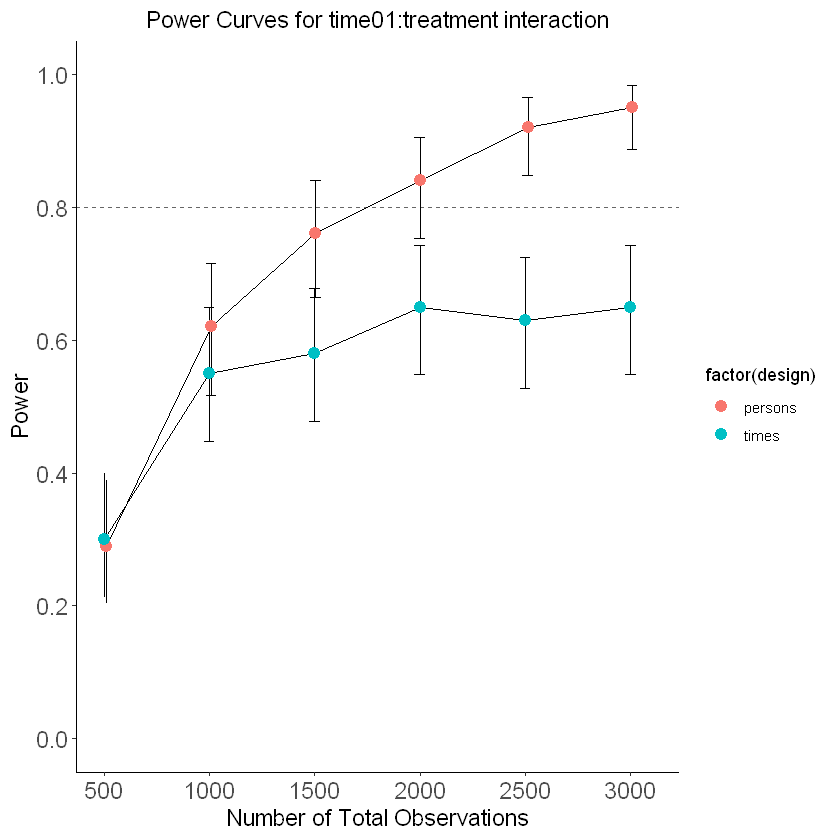

In [64]:
ggplot(data = powerdata_all,
       aes(y = mean, x=nrow, group=factor(design)) ) +
  #power goal
  geom_hline(yintercept=0.8, color="gray40",lty = 2) +
  #persons curve
  geom_line(color="black") +
  geom_errorbar(ymin=powerdata_all$lower,ymax=powerdata_all$upper, width=50, color="black") +
  geom_point(aes(color=factor(design)),size=3,  show.legend = TRUE) +
  #scale_shape_manual(values=c(15,17)) +
  scale_x_continuous(limits=c(500,3100),
                     breaks=c(500,1000,1500,2000,2500,3000),
                     name="Number of Total Observations") +
  scale_y_continuous(limits=c(0,1.0), 
                     breaks=c(0,.2,.4,.6,.8,1.0), 
                     name="Power") +  
  theme_classic() +
  theme(axis.title=element_text(size=14),
        axis.text=element_text(size=14),
        plot.title=element_text(size=14, hjust=.5)) +
  ggtitle("Power Curves for time01:treatment interaction")

参考文献：
Bolger, N., & Laurenceau, J.-P. (2013). Intensive longitudinal methods: An introduction to diary and experience sampling research. Guilford Press.

# 广义多层线性模型——统计功效和样本量（Power Analysis for MLM）

In [1]:
data_categorical <- read.csv(file="C:/Users/77387/Desktop/Data_analysis_courses/R语言与多层线性模型/BLdata_categorical.csv",header=TRUE)

In [2]:
head(data_categorical)

,id,time,time7c,pconf,lpconf,lpconfc,amang,amangc,amangcb,amangcw
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,-1.875699,0,0,-0.1568773,0.4166667,-0.0697026,-0.4709372,0.4012346
2,1,3,-1.727551,0,0,-0.1568773,0.0000000,-0.4863693,-0.4709372,-0.0154321
3,1,4,-1.579402,0,0,-0.1568773,0.0000000,-0.4863693,-0.4709372,-0.0154321
4,1,5,-1.431254,0,0,-0.1568773,0.0000000,-0.4863693,-0.4709372,-0.0154321
5,1,6,-1.283106,1,0,-0.1568773,0.0000000,-0.4863693,-0.4709372,-0.0154321
6,1,7,-1.134958,0,1,0.8431227,0.0000000,-0.4863693,-0.4709372,-0.0154321


该数据中有61个被试，每个被试有27个时间点,

因变量ponf为0/1变量

In [3]:
unique(data_categorical$pconf )

[1] 0 1

使用多层广义线性模型（逻辑回归）探讨amangcw 、 amangcb 、 lpconfc 、 time7c对 pconf 发生的影响。

In [6]:
#建模
fit_catmodel <- glmer(pconf ~ 1 + amangcw + amangcb + lpconfc + time7c +
                               (1 | id),
                      family=binomial,
                      data=data_categorical,
                      na.action = na.exclude)
#提取模型参数
summary(fit_catmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pconf ~ 1 + amangcw + amangcb + lpconfc + time7c + (1 | id)
   Data: data_categorical

     AIC      BIC   logLik deviance df.resid 
  1084.8   1116.0   -536.4   1072.8     1339 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7981 -0.4224 -0.3533 -0.2893  4.5619 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 0.2475   0.4975  
Number of obs: 1345, groups:  id, 61

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.90161    0.10894 -17.455  < 2e-16 ***
amangcw      0.21565    0.06738   3.200  0.00137 ** 
amangcb     -0.22437    0.22399  -1.002  0.31649    
lpconfc      0.31826    0.20892   1.523  0.12767    
time7c      -0.19222    0.07073  -2.718  0.00657 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr) amngcw amn

欲了解 amangcw 对因变量 pconf 的影响

In [8]:
SimPower_Direct<-powerSim(fit_catmodel,test=fixed("amangcw","lr"),
                          seed=1234, #set for replication
                          nsim=100, alpha=.05, progress=FALSE)

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [9]:
SimPower_Direct

Power for predictor 'amangcw', (95% confidence interval):
      79.00% (69.71, 86.51)

Test: Likelihood ratio
      Effect size for amangcw is 0.22

Based on 100 simulations, (0 warnings, 0 errors)
alpha = 0.05, nrow = 1345

Time elapsed: 0 h 1 m 48 s

nb: result might be an observed power calculation